In [ ]:
# import torch

# e12: removed *100 from posweight for both basic_train and basic_validate, ~20 epochs, not great
# e13: try again, also removed *100
!python main.py train -i f36 -j options/nova_bbbc_vit.yaml

# !python main.py test -i f22 -j options/nova1.yaml

# a36: alexnet training, March 5
# a110: efficientnet2 training (only cell level output), March 8
# a129: validation dataset (40 imgs) training with both cell and image level, efficientnet2, March 9
# a134: testing dataset (800 imgs) training with both cell and image level, efficientnet2, March 9, 53 epochs
# d15: vit training
# e15: vit training with updated model complexity, 3/23 --> loss nan at epoch 6!! :( change back to no *100 for weights
# d16: vit second training, 3/23
# e81: vit2 with batch size 6, very low complexity stem_chs=[12, 8, 12], LR 0.0008 3/25
# e83: vit2 with batch size 2, og MedViT_small complexity stem_chs=[64, 32, 64], LR 0.0005 3/26
# f3: vit2 with batch size 4, MedViT_base complexity stem_chs=[64, 32, 64], LR 0.0005, steplr 4/7
# f4: vit2 with batch size 4, MedViT_base complexity stem_chs=[64, 32, 64], LR 0.00002, steplr 4/8
# f7: vit2 with batch size 2, MedViT_large complexity stem_chs=[64, 32, 64], LR 0.00002, coslr 4/8
# f9: vit2 with batch size 2, MedViT_large complexity stem_chs=[64, 32, 64], LR 0.00002, no noise steplr 4/9
# f11: vit2 with batch size 4, MedViT_base complexity stem_chs=[64, 32, 64], LR 0.00002, no noise steplr 4/9
# f15: vit2 with batch size 5, MedViT_small complexity stem_chs=[64, 32, 64], LR 0.00002, no noise steplr 4/9 [best train so far, 0.60; test so far, 0.56]
# f17: vit2 with batch size 4, MedViT_small complexity stem_chs=[64, 32, 64], LR 0.00001, no noise steplr 4/9
# f20: vit2 with batch size 4, MedViT_small complexity stem_chs=[64, 32, 64], LR 0.00002, no noise steplr 4/18. new HPA dataset
# f23: vit2 with batch size 1, MedViT_large LR 0.00002, no noise steplr patience 0.99 --> 0.8 4/19. new HPA dataset
# f34: BBBC vit2 with batch size 3, MedViT_base LR 0.00002, 4/21
# f36: BBBC vit2 with batch size 3, MedViT_small LR 0.00002, 4/21

2024-04-21 21:24:26.212269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 21:24:26.212317: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 21:24:26.213773: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-21 21:24:26.221086: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 21:24:28.161626: W tensorflow/compiler/tf2

(180, 106, 4)


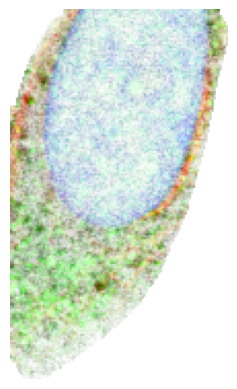

In [9]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img_path = '../preprocessing/train_5000/cell_10/0be5816c-bbc6-11e8-b2bc-ac1f6b6435d0_cell1.png'
# img_path = '../preprocessing/train/cell/0be5816c-bbc6-11e8-b2bc-ac1f6b6435d0_cell1.png'
img = mpimg.imread(img_path)
print(img.shape)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()



# img_path = '../preprocessing/train_5000/cell_10/0be5816c-bbc6-11e8-b2bc-ac1f6b6435d0_cell1.png'
# np.load(img_path)

In [15]:
!pip install einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 7.4 MB/s eta 0:00:00


In [ ]:
# Mar 9: Updating driver. for CUDA 12.1
# https://pytorch.org/get-started/previous-versions/
# !pip install torch==2.1.2 torchvision==0.16.2 torchaudio==2.1.2 --index-url https://download.pytorch.org/whl/cu121

# Mar 9: Updating driver. for CUDA 11.3
! pip install torch==1.12.0+cu113 torchvision==0.13.0+cu113 torchaudio==0.12.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 117.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 64.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 48.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2+cu121
    Uninstalling torch-2.1.2+cu121:
      Successfully uninstalled torch-2.1.2+cu121
